# Frequency Analysis of .COM Domain Names

Question: What are the most common delimieters used for domain names?  
* (no delimiter most popular?
* - dash
* _ underscore
* -my- my in between two dashes.
       

How do we find out what the most common delimiters are? Look for most common set of characters used in .com domain names.

* 4 characters would help us find "-my-" used in burisma.
* 1 character would hopefully find that - is the most common used after alpha characters.
* 2 and 3 would reveal interesting patters....maybe www in domain names? ssl? the? ww? oo?


TH , ER , ON , and AN most popular in english language
Frequency Analysis
http://practicalcryptography.com/cryptanalysis/letter-frequencies-various-languages/english-letter-frequencies/

Frequency analysis of .com domain names

https://datagenetics.com/blog/march22012/

Maybe not scientific paper?  
http://ryandoyle.net/assets/papers/Frequency_analysis_second_level_domains_June_2010_RDoyle.pdf

## English Letter Frequency Analysis
https://norvig.com/mayzner.html


I was going down the path of looking at string length differences between the paired domain names and the 2nd and 3rd level, and ideally, a good measure would be the distance of the two complete instances excluding any delimiters.  So, for www and domain, wwwdomain.com and www-domain.com should be considered equally suspicious, because when you exclude the delimiter in the comparison, both are zero.  This is important because in order to find a match for the burisma case, the delimiter used is "-my-".  But, how does an algorithm know that "-my-" is a delimiter. My first thought is to do a frequency analysis of the quadgrams for all .com domain names, and then see where they differ from English language.  
In researching, I did come across this paper, which is on the same line of questioning that I am on:  
https://www.hindawi.com/journals/jcnc/2019/4612474/#experimental-and-result-analysis

There has been some other related work with frequency count of domain names to detect malicious command and control domains as well:  https://www.researchgate.net/publication/325714929_Detection_of_Algorithmically_Generated_Malicious_Domain

I'm going to do a frequency count of domain names, starting with maybe 4 or 5 characters and see what I come up with.  If I'm correct, the "-my-" should be high in the list of most popular quadgrams.  for the trigrams, it will be interesting to see where www ends up.  For the monograms, I expect to see dash be the most frequent non alpha character used.  I'm curious to see if it beats out numbers.


In [3]:
import io
import tldextract as tlde

#NOTE:  I HAVE THIS DISABLED IN THE JUPYTER NOTEBOOK BECAUSE IT CAN TAKE A LONG TIME TO RUN....
#       It works, it just is probably better to run in a terminal to keep an eye on it.
#
#  comment out the following line to run it for realz
assert(False)

bigCOMZoneFile = '/mnt/d/flat_domain_all_unique_sorted'

bigFile = open(bigCOMZoneFile)
characterCount = {}
stringLength = 4

count = 0



row = bigFile.readline()
while row:
    ext = tlde.extract(row.lower())
    #print(ext.domain)
    if ((len(ext.domain) > 3) and (ext.domain[0:4] == "xn--")):
        #this is a punycode domain, we want to skip it.
        this_is_silly = true
    else:
        if (len(ext.domain) >= stringLength):
            numSets = len(ext.domain) - (stringLength + 1)
            currentSet = 0
            while currentSet < numSets:
                found = characterCount.get(ext.domain[currentSet:stringLength + currentSet])
                if found:
                    characterCount[ext.domain[currentSet:stringLength + currentSet]] = characterCount[ext.domain[currentSet:stringLength + currentSet]] + 1
                else:
                    characterCount[ext.domain[currentSet:stringLength + currentSet]] = 1
                    count = count + 1

                currentSet = currentSet + 1
            #print(ext.domain)
    row = bigFile.readline()

#for x in characterCount:
#    print(x, characterCount[x])

count = 0
for w in sorted(characterCount, key=characterCount.get, reverse=True):
    print(w, characterCount[w])
    count = count + 1

AssertionError: 

Original Top 4:
* tion 4057588
* xn-- 3095229
* atio 3052740
* serv 2681628

I was surprised by "xn--" because I was not aware that DNS uses punycode for unicode .com domain names, and to specify that the characters are punycode encoded, the domain names start with "xn--".  I will now filter out all of the "xn--" domain names and re-run.  This would be a good time to talk about punycode.

Top 4 after punycode domains removed:
* tion 4049097
* atio 3047393
* serv 2677958
* onli 2470306


# an aside on Punycode

DNS supports limited characterset of Letters, Digits and the Hyphen (often referred to as the LDH subset).  In order to support unicode domain names, punycode is the mechanisms by which unicode is represented in the LDH subset.

Example #1:

XN-----VLDBXLLGURSSE5GDI7A.COM

decodes to:

ריסלר-אחסון-אתרים.com

Example #2:

XN-----ULDVBAUDAF1EHL6FMEF0A.COM

decodes to:

لوله-پلی-اتیلن.COM



461951,ota,tinno,howtotalktoyourkidsaboutinnovation.com  Totally not a match....


# Question:
* What quadgrams are **not** represented?
* What can we find for Sharepoint.com?
*    Look for cubenergy-my.sharepoint.com
*    Univoftulsa-my.sharepoint.com
* http://univoftulsa-my-sharepoint.com/ ????


# Ideas
Look at subdomains of sharepoint.com that happen to end in -my.  
Take that list and look for legit domains.

In [15]:
import io
import tldextract as tlde

#NOTE:  I HAVE THIS DISABLED IN THE JUPYTER NOTEBOOK BECAUSE IT CAN TAKE A LONG TIME TO RUN....
#       It works, it just is probably better to run in a terminal to keep an eye on it.
#
#  comment out the following line to run it for realz
assert(False)
#alternatively, load up the unigram.txt file into memory...

bigCOMZoneFile = '/mnt/d/flat_domain_all_unique_sorted'

bigFile = open(bigCOMZoneFile)
characterCount = {}
stringLength = 1

count = 0


row = bigFile.readline()
while row:
    ext = tlde.extract(row.lower())
    #print(ext.domain)
    if ((len(ext.domain) > 3) and (ext.domain[0:4] == "xn--")):
        #this is a punycode domain, we want to skip it.
        this_is_silly = True
    else:
        if (len(ext.domain) >= stringLength):
            numSets = len(ext.domain) - (stringLength + 1)
            currentSet = 0
            while currentSet < numSets:
                found = characterCount.get(ext.domain[currentSet:stringLength + currentSet])
                if found:
                    characterCount[ext.domain[currentSet:stringLength + currentSet]] = characterCount[ext.domain[currentSet:stringLength + currentSet]] + 1
                else:
                    characterCount[ext.domain[currentSet:stringLength + currentSet]] = 1
                    count = count + 1

                currentSet = currentSet + 1
            #print(ext.domain)
    row = bigFile.readline()

#for x in characterCount:
#    print(x, characterCount[x])

count = 0
for w in sorted(characterCount, key=characterCount.get, reverse=True):
    print(w, characterCount[w])
    count = count + 1

NameError: name 'true' is not defined

In [9]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

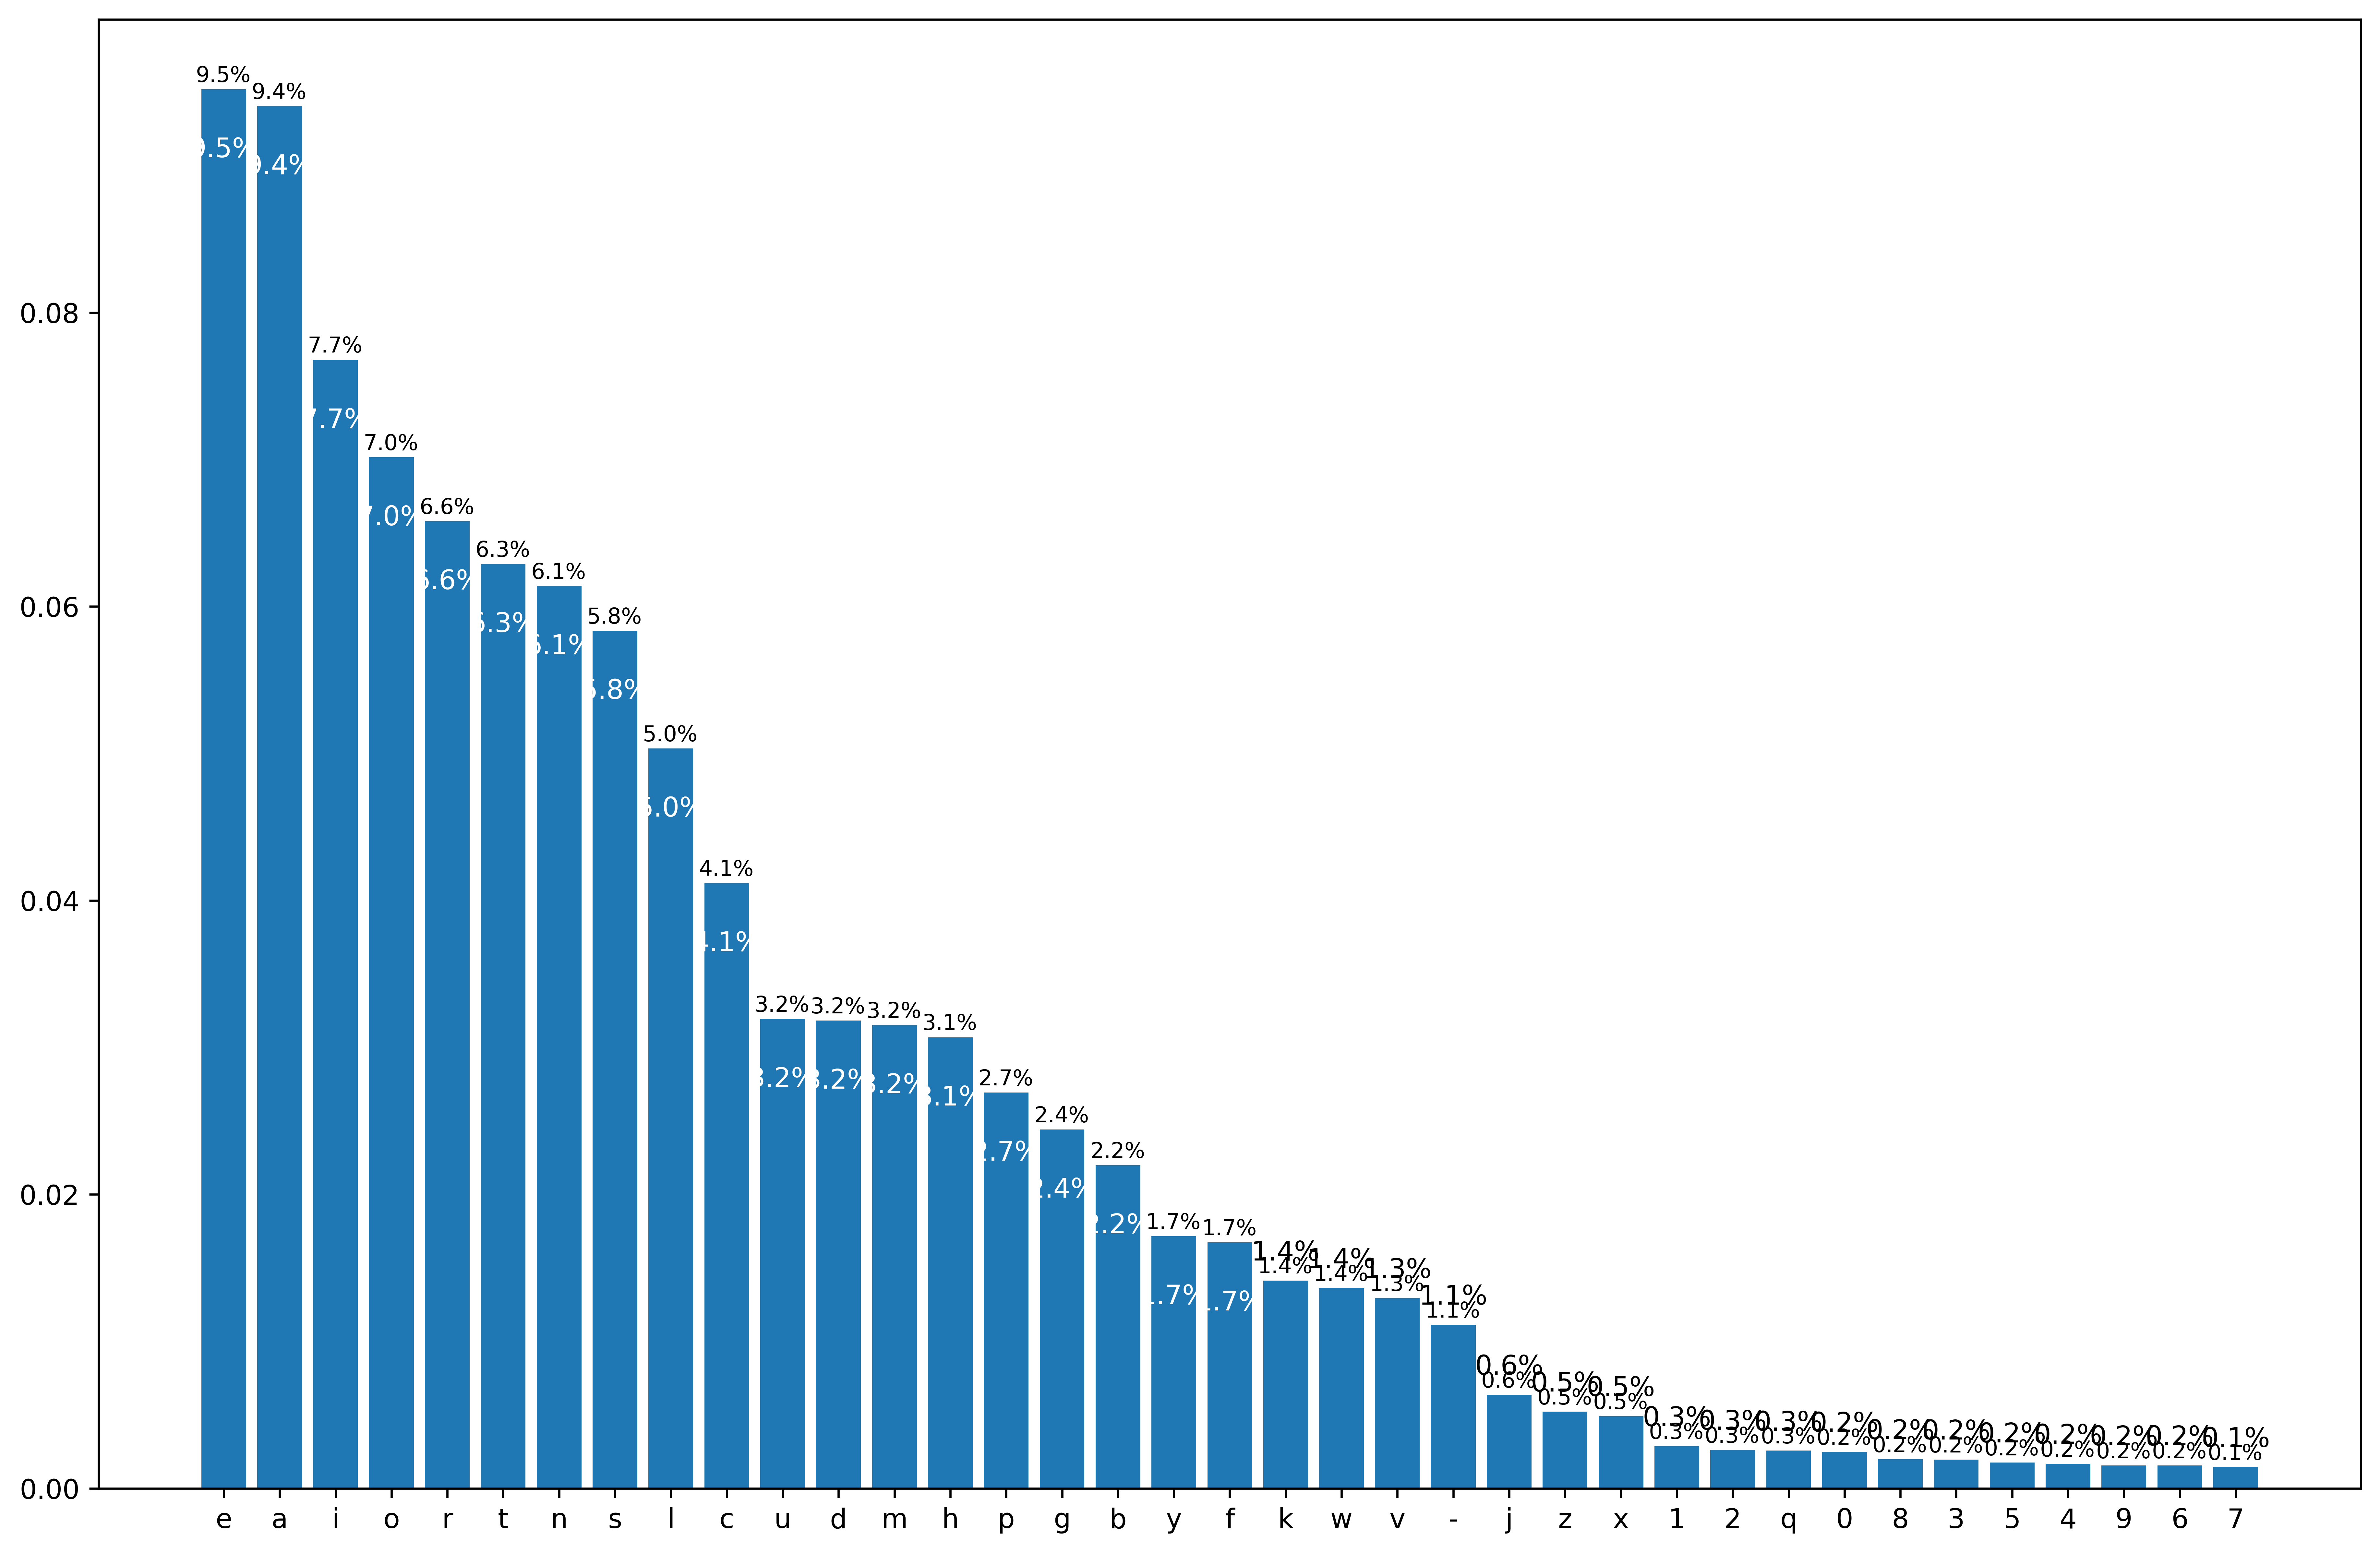

+--------+------------+
| Letter | Percentage |
+--------+------------+
|   e    |   9.518%   |
|   a    |   9.404%   |
|   i    |   7.677%   |
|   o    |   7.014%   |
|   r    |   6.580%   |
|   t    |   6.288%   |
|   n    |   6.138%   |
|   s    |   5.835%   |
|   l    |   5.033%   |
|   c    |   4.118%   |
|   u    |   3.193%   |
|   d    |   3.182%   |
|   m    |   3.152%   |
|   h    |   3.069%   |
|   p    |   2.692%   |
|   g    |   2.441%   |
|   b    |   2.198%   |
|   y    |   1.716%   |
|   f    |   1.673%   |
|   k    |   1.414%   |
|   w    |   1.363%   |
|   v    |   1.294%   |
|   -    |   1.113%   |
|   j    |   0.637%   |
|   z    |   0.522%   |
|   x    |   0.491%   |
|   1    |   0.287%   |
|   2    |   0.262%   |
|   q    |   0.256%   |
|   0    |   0.248%   |
|   8    |   0.197%   |
|   3    |   0.195%   |
|   5    |   0.175%   |
|   4    |   0.167%   |
|   9    |   0.156%   |
|   6    |   0.155%   |
|   7    |   0.144%   |
+--------+------------+


In [4]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plot
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['figure.dpi'] = 600

def label_bars(ax, bars, text_format, **kwargs):
    """
    Attaches a label on every bar of a regular or horizontal bar chart
    """
    ys = [bar.get_y() for bar in bars]
    y_is_constant = all(y == ys[0] for y in ys)  # -> regular bar chart, since all all bars start on the same y level (0)

    if y_is_constant:
        _label_bar(ax, bars, text_format, **kwargs)
    else:
        _label_barh(ax, bars, text_format, **kwargs)


def _label_bar(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    """
    max_y_value = ax.get_ylim()[1]
    inside_distance = max_y_value * 0.05
    outside_distance = max_y_value * 0.01

    for bar in bars:
        text = text_format.format(bar.get_height())
        text_x = bar.get_x() + bar.get_width() / 2

        is_inside = bar.get_height() >= max_y_value * 0.15
       
        if is_inside:
            color = "white"
            text_y = bar.get_height() - inside_distance
        else:
            color = "black"
            text_y = bar.get_height() + outside_distance
            
        #print(text_x, text_y, text)
        ax.text(text_x, text_y, text, ha='center', va='bottom', color=color, **kwargs)


def _label_barh(ax, bars, text_format, **kwargs):
    """
    Attach a text label to each bar displaying its y value
    Note: label always outside. otherwise it's too hard to control as numbers can be very long
    """
    max_x_value = ax.get_xlim()[1]
    distance = max_x_value * 0.0025

    for bar in bars:
        text = text_format.format(bar.get_width())

        text_x = bar.get_width() + distance
        text_y = bar.get_y() + bar.get_height() / 2

        ax.text(text_x, text_y, text, va='center', **kwargs)

unigramFile = "/mnt/d/FrequencyCounter/unigram.txt"

readFile = open(unigramFile)

x = []
y = []
ypercent = []
total = 0
count = 0

line = readFile.readline()
while line:
    strings = line.split(" ")
    x.append(strings[0])
    y.append(int(strings[1]))
    
    total = total + int(strings[1])
    count = count + 1
    line = readFile.readline()
    
count = 0
while count < len(y):
    ypercent.append(y[count] / total)
    count = count + 1


fig, ax = plot.subplots()
bars = ax.bar(x, ypercent, align="center")

value_format = "{:.1%}"  # displaying values as percentage with one fractional digit
label_bars(ax, bars, value_format)
for bar in bars:
    text_x = bar.get_x() - 0.1
    text_y = bar.get_height() + 0.0005
    #rint(text_x, text_y)
    text = value_format.format(bar.get_height())
    ax.text(text_x, text_y, text, fontsize=8)
    
#ax.text(-0.5, 0.097, "9.5%")
plot.show()

#ax.text(3, 0.08, "test")
#plot.bar(x, ypercent)

from prettytable import PrettyTable
mytable = PrettyTable()

mytable.field_names = ["Letter", "Percentage"]
count = 0
while count < len(x):
    percentage = "{:.3%}".format(ypercent[count])
    mytable.add_row([x[count], percentage])
    count = count + 1
    
print(mytable)

## Lets look at just the alpha characters, so we can compare to the english language.


In [6]:
justalpha = []
justalphacount = []
alphatotal = 0

count = 0
while count < len(x):
    if x[count] in 'abcdefghijklmnopqrstuvwxyz':
        justalpha.append(x[count])
        justalphacount.append(y[count])
        alphatotal = alphatotal + y[count]
    count = count + 1
    
justalphapercent = []
count = 0
while count < len(justalpha):
    justalphapercent.append(justalphacount[count] / alphatotal)
    count = count + 1
    
from prettytable import PrettyTable
mytable = PrettyTable()

mytable.field_names = ["Letter", "Percentage"]
count = 0
while count < len(justalpha):
    percentage = "{:.3%}".format(justalphapercent[count])
    mytable.add_row([justalpha[count], percentage])
    count = count + 1
    
print(mytable)

+--------+------------+
| Letter | Percentage |
+--------+------------+
|   e    |   9.823%   |
|   a    |   9.705%   |
|   i    |   7.923%   |
|   o    |   7.239%   |
|   r    |   6.791%   |
|   t    |   6.489%   |
|   n    |   6.335%   |
|   s    |   6.021%   |
|   l    |   5.194%   |
|   c    |   4.250%   |
|   u    |   3.295%   |
|   d    |   3.284%   |
|   m    |   3.253%   |
|   h    |   3.167%   |
|   p    |   2.778%   |
|   g    |   2.520%   |
|   b    |   2.269%   |
|   y    |   1.770%   |
|   f    |   1.726%   |
|   k    |   1.459%   |
|   w    |   1.407%   |
|   v    |   1.335%   |
|   j    |   0.657%   |
|   z    |   0.539%   |
|   x    |   0.507%   |
|   q    |   0.265%   |
+--------+------------+


# Now a frequency analaysis of about 479k english words

In [13]:
# From https://github.com/dwyl/english-words
# https://raw.githubusercontent.com/dwyl/english-words/master/words_alpha.txt

import io
import tldextract as tlde

englishWordFile = 'words_alpha.txt'

bigFile = open(englishWordFile)
characterCount = {}
stringLength = 1

count = 0

row = bigFile.readline()
while row:
    ext = row.lower()
    if (len(ext) >= stringLength):
        numSets = len(ext) - (stringLength + 1)
        currentSet = 0
        while currentSet < numSets:
            found = characterCount.get(ext[currentSet:stringLength + currentSet])
            if found:
                characterCount[ext[currentSet:stringLength + currentSet]] = characterCount[ext[currentSet:stringLength + currentSet]] + 1
            else:
                characterCount[ext[currentSet:stringLength + currentSet]] = 1
                count = count + 1

            currentSet = currentSet + 1
    row = bigFile.readline()


count = 0
for w in sorted(characterCount, key=characterCount.get, reverse=True):
    print(w, characterCount[w])
    count = count + 1


e 319495
i 309635
a 279419
o 248019
n 225798
r 225374
t 210116
l 176591
s 174618
c 139291
u 130684
p 110926
m 94809
h 86299
d 82297
b 63302
g 63134
f 38066
y 33803
v 32934
k 23279
w 21454
z 14505
x 9466
q 5853
j 5426
